# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [31]:
import pandas as pd

In [32]:
data =  pd.read_csv('pollution_dataset.csv')

In [33]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [34]:
data.isnull().sum() 

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [36]:
data['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

data['Air Quality'] = encoder.fit_transform(data[['Air Quality']])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


In [39]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0.0


In [41]:
x, y = data.drop('Air Quality', axis=1), data['Air Quality']

In [43]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report

In [54]:
# model 1
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=train_x.shape[1]))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(4, activation='softmax'))
model1.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3916 - loss: 20.9649 - val_accuracy: 0.6975 - val_loss: 0.8297
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6673 - loss: 0.8584 - val_accuracy: 0.7100 - val_loss: 0.7039
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6342 - loss: 0.9060 - val_accuracy: 0.7563 - val_loss: 0.6002
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7318 - loss: 0.6539 - val_accuracy: 0.7975 - val_loss: 0.5083
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7752 - loss: 0.5358 - val_accuracy: 0.7837 - val_loss: 0.5390
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.4830 - val_accuracy: 0.6825 - val_loss: 0.6314
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.7519 - loss: 0.5800 - val_accuracy: 0.7862 - val_loss: 0.5256
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8032 - loss: 0.4996 - val_accuracy:

In [58]:
# model 2
model2 = Sequential()
model2.add(Dense(64, activation='tanh', input_dim=train_x.shape[1]))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3809 - loss: 1.2877 - val_accuracy: 0.5138 - val_loss: 1.0436
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5441 - loss: 0.9819 - val_accuracy: 0.6325 - val_loss: 0.8475
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.6321 - loss: 0.7690 - val_accuracy: 0.6350 - val_loss: 0.8685
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6939 - loss: 0.7566 - val_accuracy: 0.6525 - val_loss: 0.7465
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6684 - loss: 0.7023 - val_accuracy: 0.6825 - val_loss: 0.7558
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6709 - loss: 0.7051 - val_accuracy: 0.5113 - val_loss: 1.0926
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6582 - loss: 0.7696 - val_accuracy: 0.6700 - val_loss: 0.7350
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6777 - loss: 0.6853 - val_accuracy: 0.7437 - va

In [57]:
# model 3
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=train_x.shape[1]))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(4, activation='softmax'))
model3.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3531 - loss: 4.3544 - val_accuracy: 0.5663 - val_loss: 1.0987
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6857 - loss: 0.7735 - val_accuracy: 0.7125 - val_loss: 0.6101
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - loss: 0.6889 - val_accuracy: 0.7950 - val_loss: 0.5045
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7468 - loss: 0.5897 - val_accuracy: 0.7875 - val_loss: 0.5448
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7638 - loss: 0.5576 - val_accuracy: 0.7063 - val_loss: 0.5611
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.4486 - val_accuracy: 0.7675 - val_loss: 0.5080
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7986 - loss: 0.4743 - val_accuracy: 0.8000 - val_loss: 0.4758
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4883 - val_accuracy: 0.8487 - val_

In [64]:
print(f'Model 1 accuracy: {model1.evaluate(test_x, test_y, verbose=0)[1]}')
print(f'Model 2 accuracy: {model2.evaluate(test_x, test_y, verbose=0)[1]}')
print(f'Model 3 accuracy: {model3.evaluate(test_x, test_y, verbose=0)[1]}')

Model 1 accuracy: 0.8669999837875366
Model 2 accuracy: 0.652999997138977
Model 3 accuracy: 0.8889999985694885


In [67]:
import numpy as np

In [68]:
model1_pred = np.argmax(model1.predict(test_x), axis=1)
model2_pred = np.argmax(model2.predict(test_x), axis=1)
model3_pred = np.argmax(model3.predict(test_x), axis=1)
print(f'Classification report for model 1: {classification_report(test_y, model1_pred)}')
print(f'Classification report for model 2: {classification_report(test_y, model2_pred)}')
print(f'Classification report for model 3: {classification_report(test_y, model3_pred)}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification report for model 1:               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       411
         1.0       0.94      0.42      0.58       104
         2.0       0.84      0.92      0.88       300
         3.0       0.66      0.75      0.70       185

    accuracy                           0.87      1000
   macro avg       0.86      0.77      0.79      1000
weighted avg       0.88      0.87      0.86      1000

Classification report for model 2:               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       411
         1.0       0.00      0.00      0.00       104
         2.0       0.90      0.21      0.35       300
         3.0       0.37      0.96      0.53       185

    accuracy                           0.65      1000
   macro avg       0.55      0.54      0.46     

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [69]:
import matplotlib.pyplot as plt

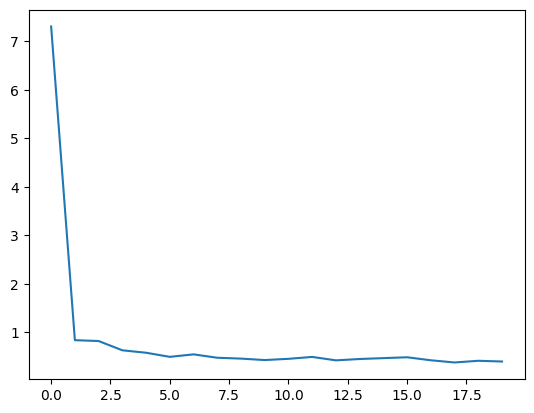

In [70]:
plt.plot(history1.history['loss'])

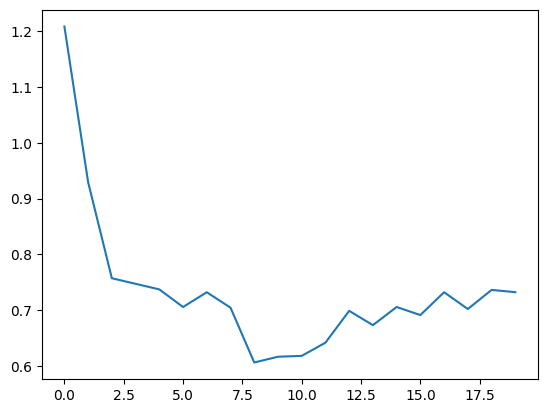

In [71]:
plt.plot(history2.history['loss'])

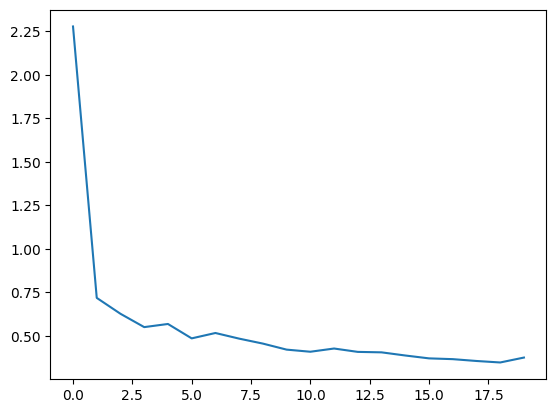

In [72]:
plt.plot(history3.history['loss'])